In [16]:
# Author: Naziah Siddique 29-06-21 

from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

from pathlib import Path

from fastai.vision.all import *

pylab.rcParams['figure.figsize'] = (8.0, 10.0)

data_dir = Path('../../data/')

In [35]:
# Fast.ai has a COCO tiny 
path = untar_data(URLs.COCO_TINY)
coco_ann_val = data_dir / Path('annotations/instances_val2017.json')
coco_img_val = data_dir / Path('images/val2017/')

In [36]:
# Fast.ai method to parse COCO annotations 
imgs, lbl_bbox = get_annotations(coco_val)
img2bbox = dict(zip(imgs, lbl_bbox))


In [37]:
first = {k: img2bbox[k] for k in list(img2bbox)[:1]}; first
getters = [lambda o: coco_img_val/o, lambda o: img2bbox[o][0], lambda o: img2bbox[o][1]]

In [38]:
item_tfms = [Resize(128, method='pad'),]
batch_tfms = [Rotate(), Flip(), Dihedral(), Normalize.from_stats(*imagenet_stats)]

In [39]:
def get_train_imgs(noop):  return imgs


In [40]:
pascal = DataBlock(blocks=(ImageBlock, BBoxBlock, BBoxLblBlock),
                 splitter=RandomSplitter(),
                 get_items=get_train_imgs,
                 getters=getters,
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms,
                 n_inp=1)

In [41]:
dls = pascal.dataloaders(coco_img_val)

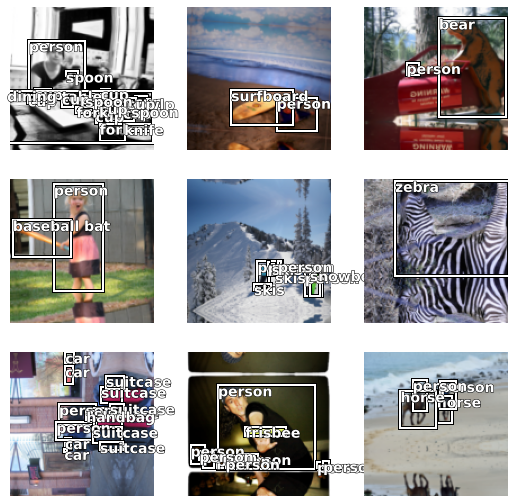

In [42]:
dls.show_batch()
